In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [61]:
df = pd.read_csv('documents.csv')
df

,id_right,text_right
0,1781133,it was used in landing craft during world war ...
1,2426736,after rejecting an offer from cambridge univer...
2,2224122,mat zan coached kuala lumpur fa in 1999 and wo...
3,219642,a barcode is a machine readable optical label ...
4,1728654,since the subordination of the monarchy under ...
...,...,...
369716,59396,the population was 416 at the 2010 census the ...
369717,1950034,the surface of the river is frozen from novemb...
369718,1984468,the first anti thrombin aptamer tba was genera...
369719,33966,state of oklahoma as of the 2010 census the po...


In [62]:
lst = {}
word_count = []
word_len = []
num = len(df)

for index, row in df.iterrows():
    words = row['text_right'].split()
    word_count.append(len(words))
    for i in words:
        word_len.append(len(i))
        if i not in lst:
            lst[i] = 1
        else:
            lst[i] = lst[i] + 1

num_unique = 0
unique_len = []
unique_words = []
unique_in_doc = []

for index, row in df.iterrows():
    words = row['text_right'].split()
    count = 0
    for i in words:
        if lst[i] == 1:
            count += 1
            unique_words.append(i)
            num_unique += 1
            unique_len.append(len(i))
    unique_in_doc.append(count)

print('Number of documents: ', num)
print('Average document length in words: ', sum(word_count) / len(word_count))
print('Collection size in words: ', sum(word_count))
print('Number of unique words: ', num_unique)
print('Average word length: ', sum(word_len) / len(word_len))
print('Average unique word length: ', sum(unique_len) / len(unique_len))

Number of documents:  369721
Average document length in words:  197.69969517555128
Collection size in words:  73093729
Number of unique words:  373080
Average word length:  4.795127048450353
Average unique word length:  8.05060576819985


In [63]:
new_lst = sorted(lst.items(), key=lambda x:x[1], reverse=True)
new_lst1 = new_lst[:30]
NLTK_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what']
count = 0
for i in range(30):
    if new_lst1[i][0] == NLTK_words[i]:
        count += 1
        print(new_lst1[i][0])
if count == 0:
    print('There are no words positioning at the same place from the top-30 words')

There are no words positioning at the same place from the top-30 words


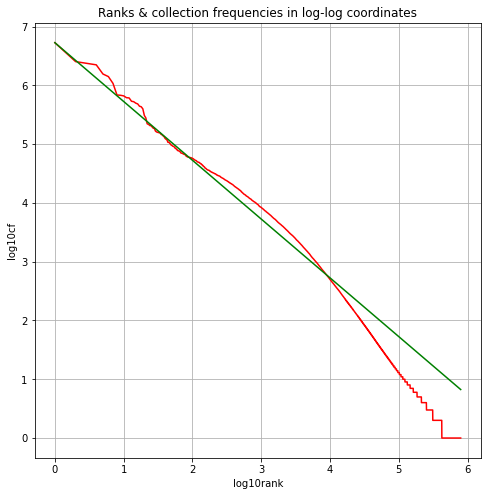

In [64]:
cf = []
rank = []

for i in range(len(new_lst)):
    cf.append(lst[new_lst[i][0]])
    rank.append(i + 1)

zipf = [math.log10(cf[0] / i) for i in rank]
rank = [math.log10(x) for x in rank]
cf = [math.log10(x) for x in cf]

fig = plt.figure(figsize=(8,8))
line1, = plt.plot(rank, cf, 'r')
line2, = plt.plot(rank, zipf, 'g')
plt.title('Ranks & collection frequencies in log-log coordinates')
plt.xlabel('log10rank')
plt.ylabel('log10cf')
plt.grid()
plt.show()

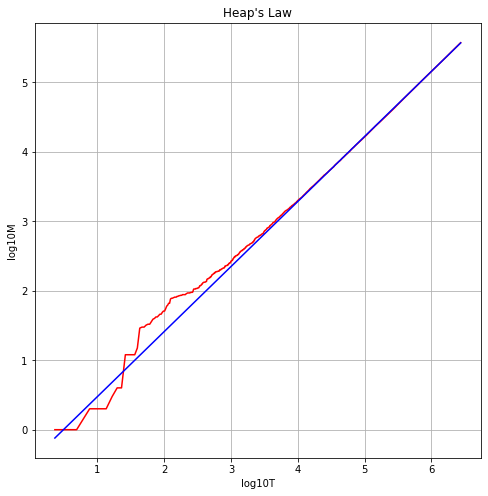

In [66]:
M = [unique_in_doc[0]]

for i in range(1, len(unique_in_doc)):
    M.append(unique_in_doc[i] + M[i-1])

for i in range(1, len(word_count)):
    word_count[i] += word_count[i-1]

word_count = [math.log10(x) for x in word_count]
M = [math.log10(x) for x in M]

mean_x = np.mean(word_count)
mean_y = np.mean(M)
numer = 0
denum = 0
for i in range(len(word_count)):
    numer += (word_count[i] - mean_x) * (M[i] - mean_y)
    denum += (word_count[i] - mean_x) ** 2
m = numer / denum
c = mean_y - (m * mean_x)

logM = [ m * x + c for x in word_count]

fig = plt.figure(figsize=(8,8))
line1, = plt.plot(word_count, M, 'r')
line2, = plt.plot(word_count, logM, 'b')
plt.title("Heap's Law")
plt.xlabel('log10T')
plt.ylabel('log10M')
plt.grid()
plt.show()